In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# yf.pdr_override() # This is not a valid function
# Use this instead:
#pdr.get_data_yahoo("TSLA")

# For time stamps
from datetime import datetime

import tensorflow as tf

In [47]:
stock_list = ['TCS.NS', 'INFY.NS', 'HCLTECH.NS', 'WIPRO.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

TCS = yf.download('TCS.NS', start, end)
INFY = yf.download('INFY.NS', start, end)
HCLTECH = yf.download('HCLTECH.NS', start, end)
WIPRO = yf.download('WIPRO.NS', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
company_list = [TCS, INFY, HCLTECH, WIPRO]

for company, stock in zip(company_list, stock_list):
    company["Company"] = stock

In [49]:
TCS.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2023-09-11,3462.000000,3485.699951,3445.000000,3480.649902,3430.699707,1783604,TCS.NS
2023-09-12,3492.000000,3589.899902,3483.000000,3580.800049,3529.412842,4476016,TCS.NS
2023-09-13,3571.100098,3588.850098,3545.000000,3567.850098,3516.648682,1754929,TCS.NS
2023-09-14,3570.050049,3597.699951,3545.600098,3560.050049,3508.960449,2604721,TCS.NS
2023-09-15,3567.850098,3607.350098,3562.449951,3598.300049,3546.661621,2952897,TCS.NS


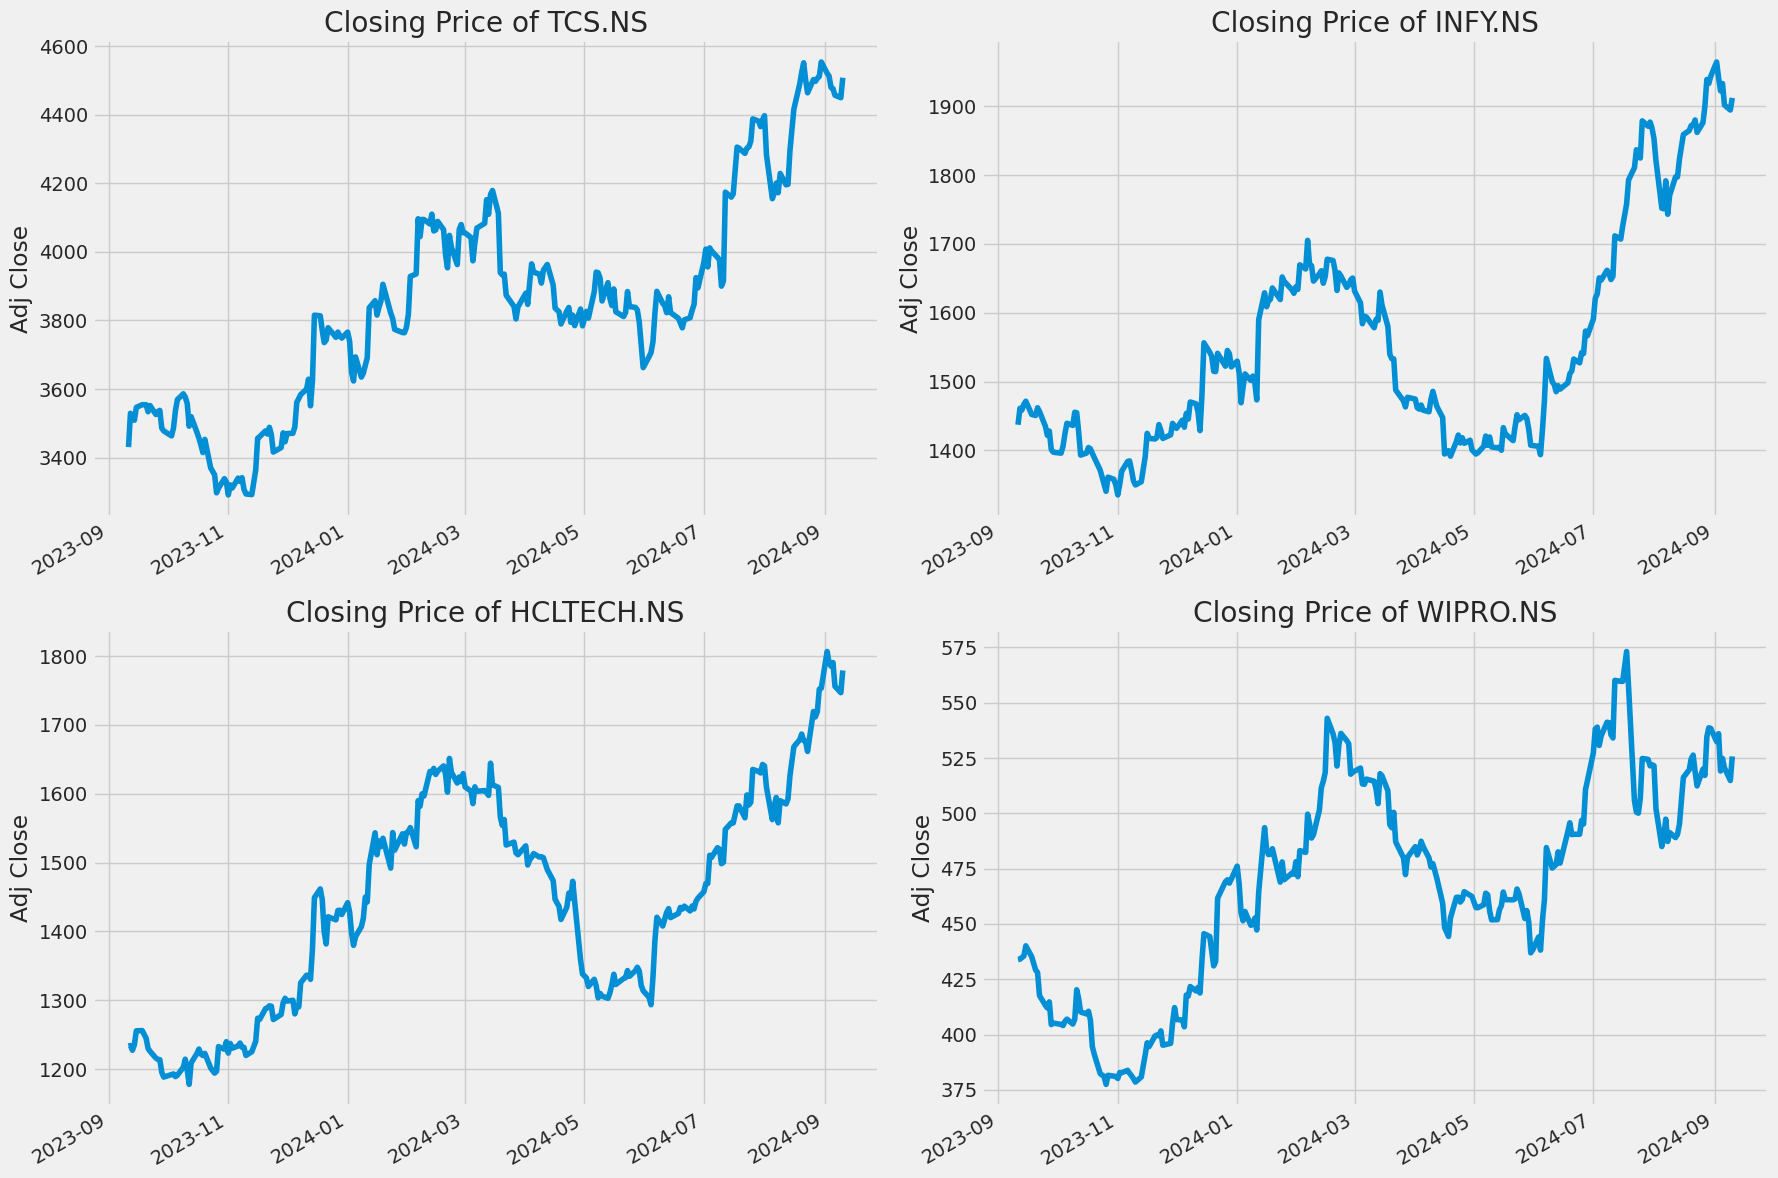

In [50]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('')
    plt.title(f"Closing Price of {stock_list[i - 1]}")

plt.tight_layout()

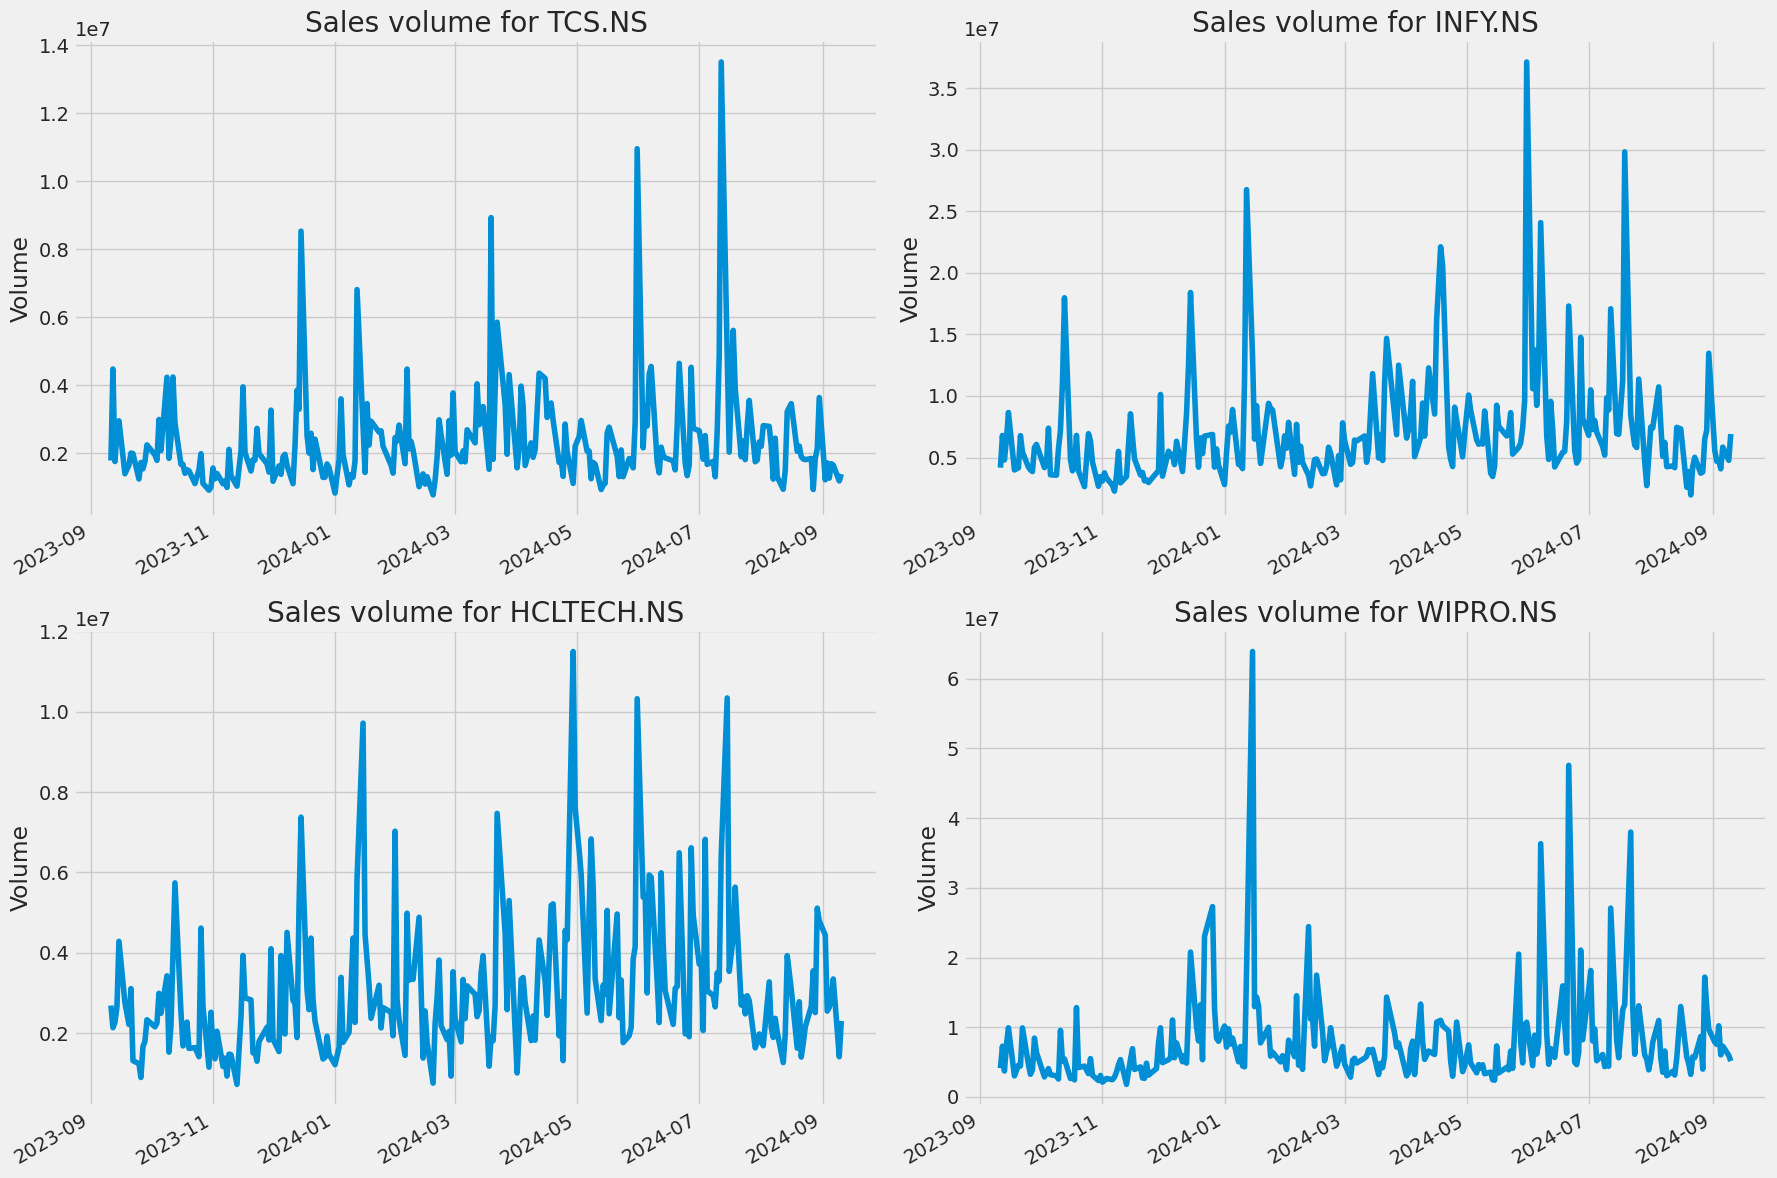

In [51]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('')
    plt.title(f"Sales volume for {stock_list[i - 1]}")

plt.tight_layout()

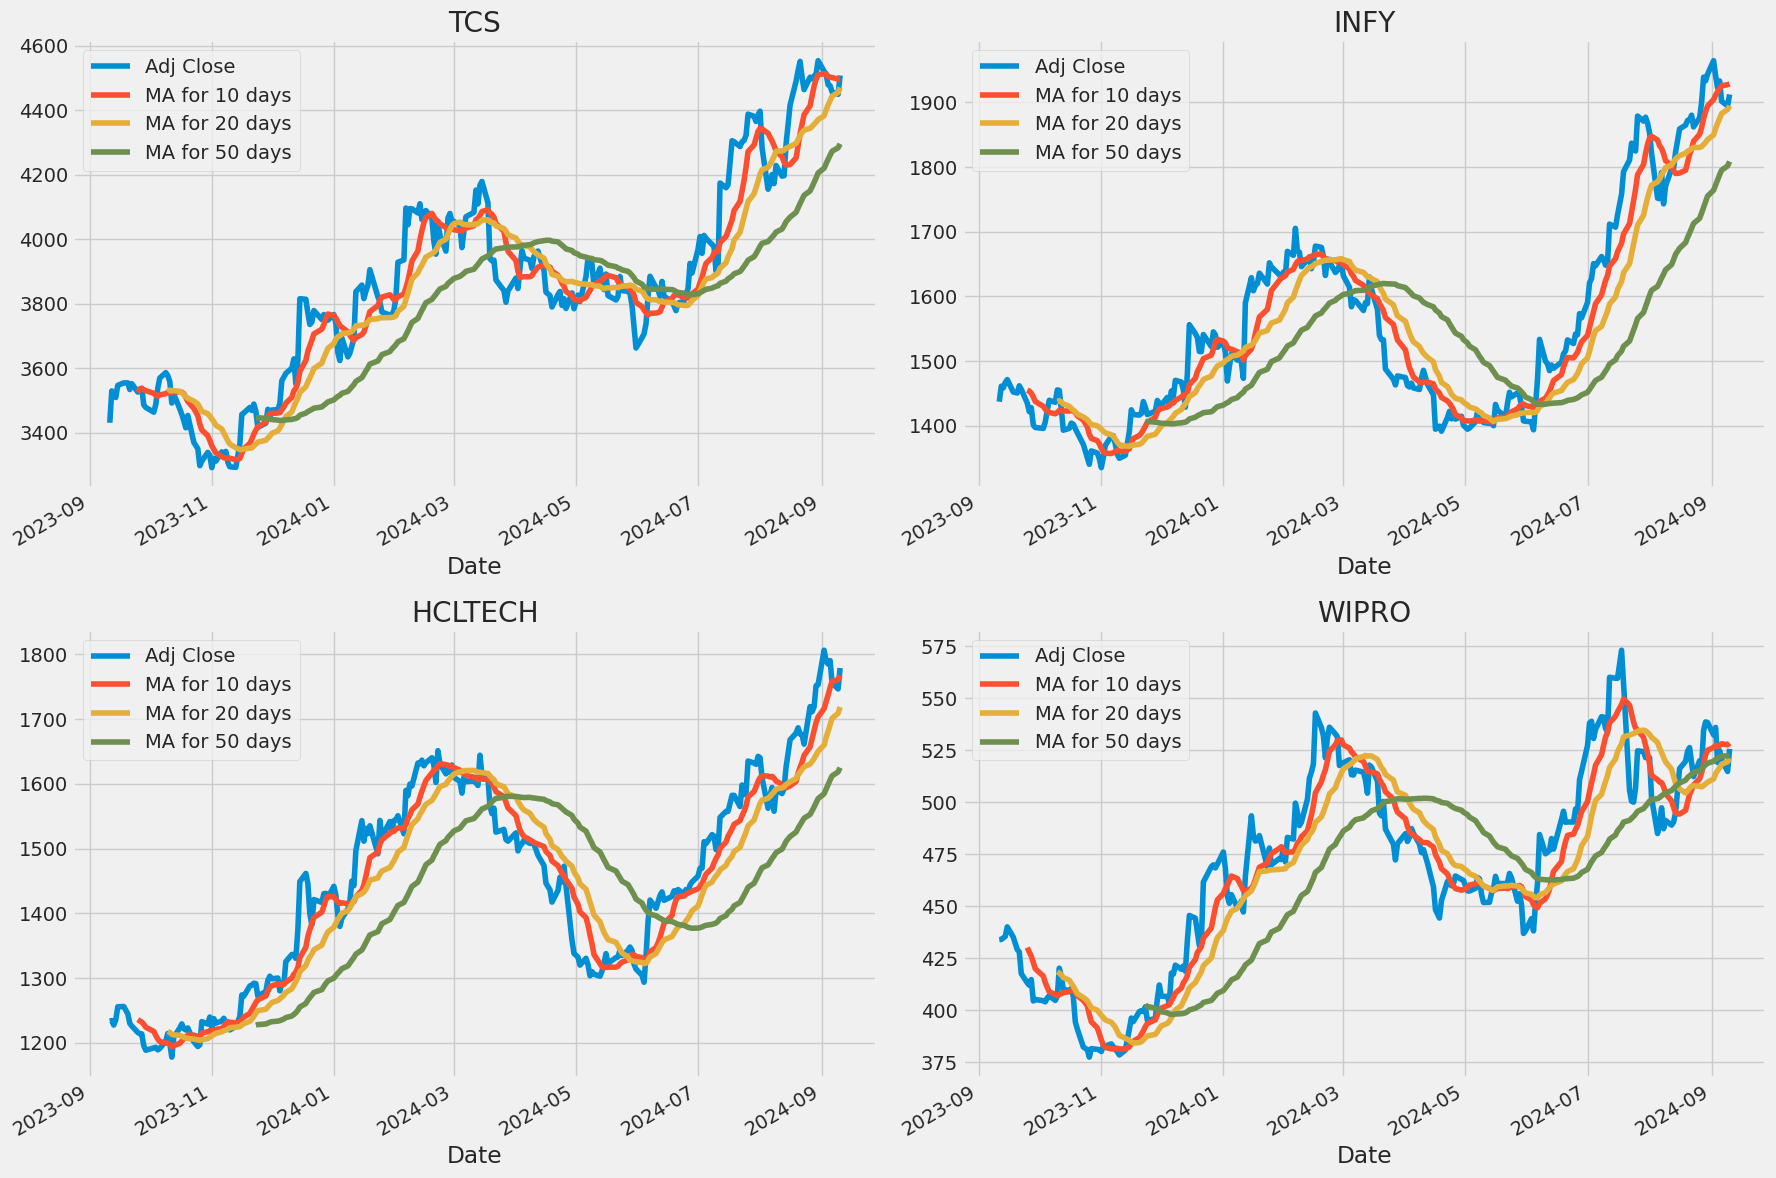

In [52]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(18)

TCS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TCS')

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('INFY')

HCLTECH[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('HCLTECH')

WIPRO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('WIPRO')

plt.tight_layout()

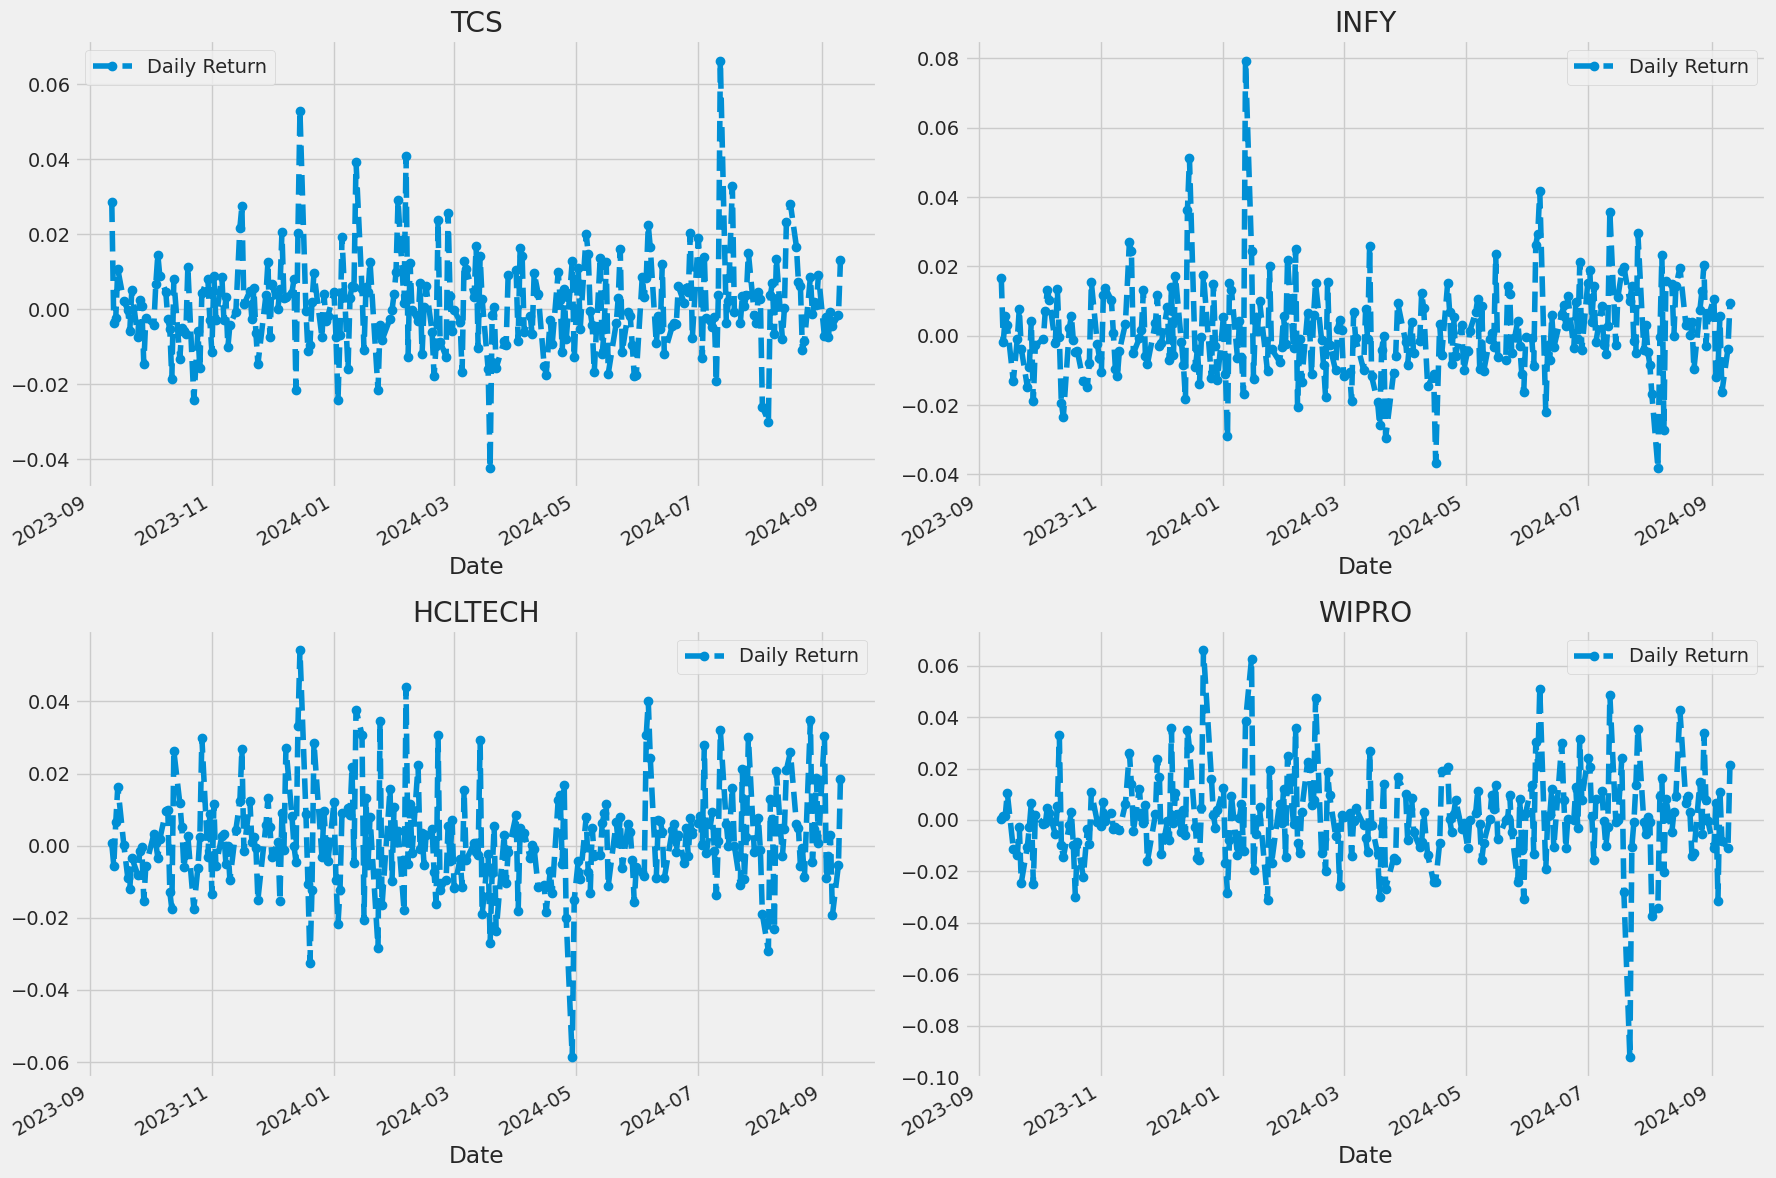

In [53]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(18)

TCS['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TCS')

INFY['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('INFY')

HCLTECH['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('HCLTECH')

WIPRO['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('WIPRO')

plt.tight_layout()

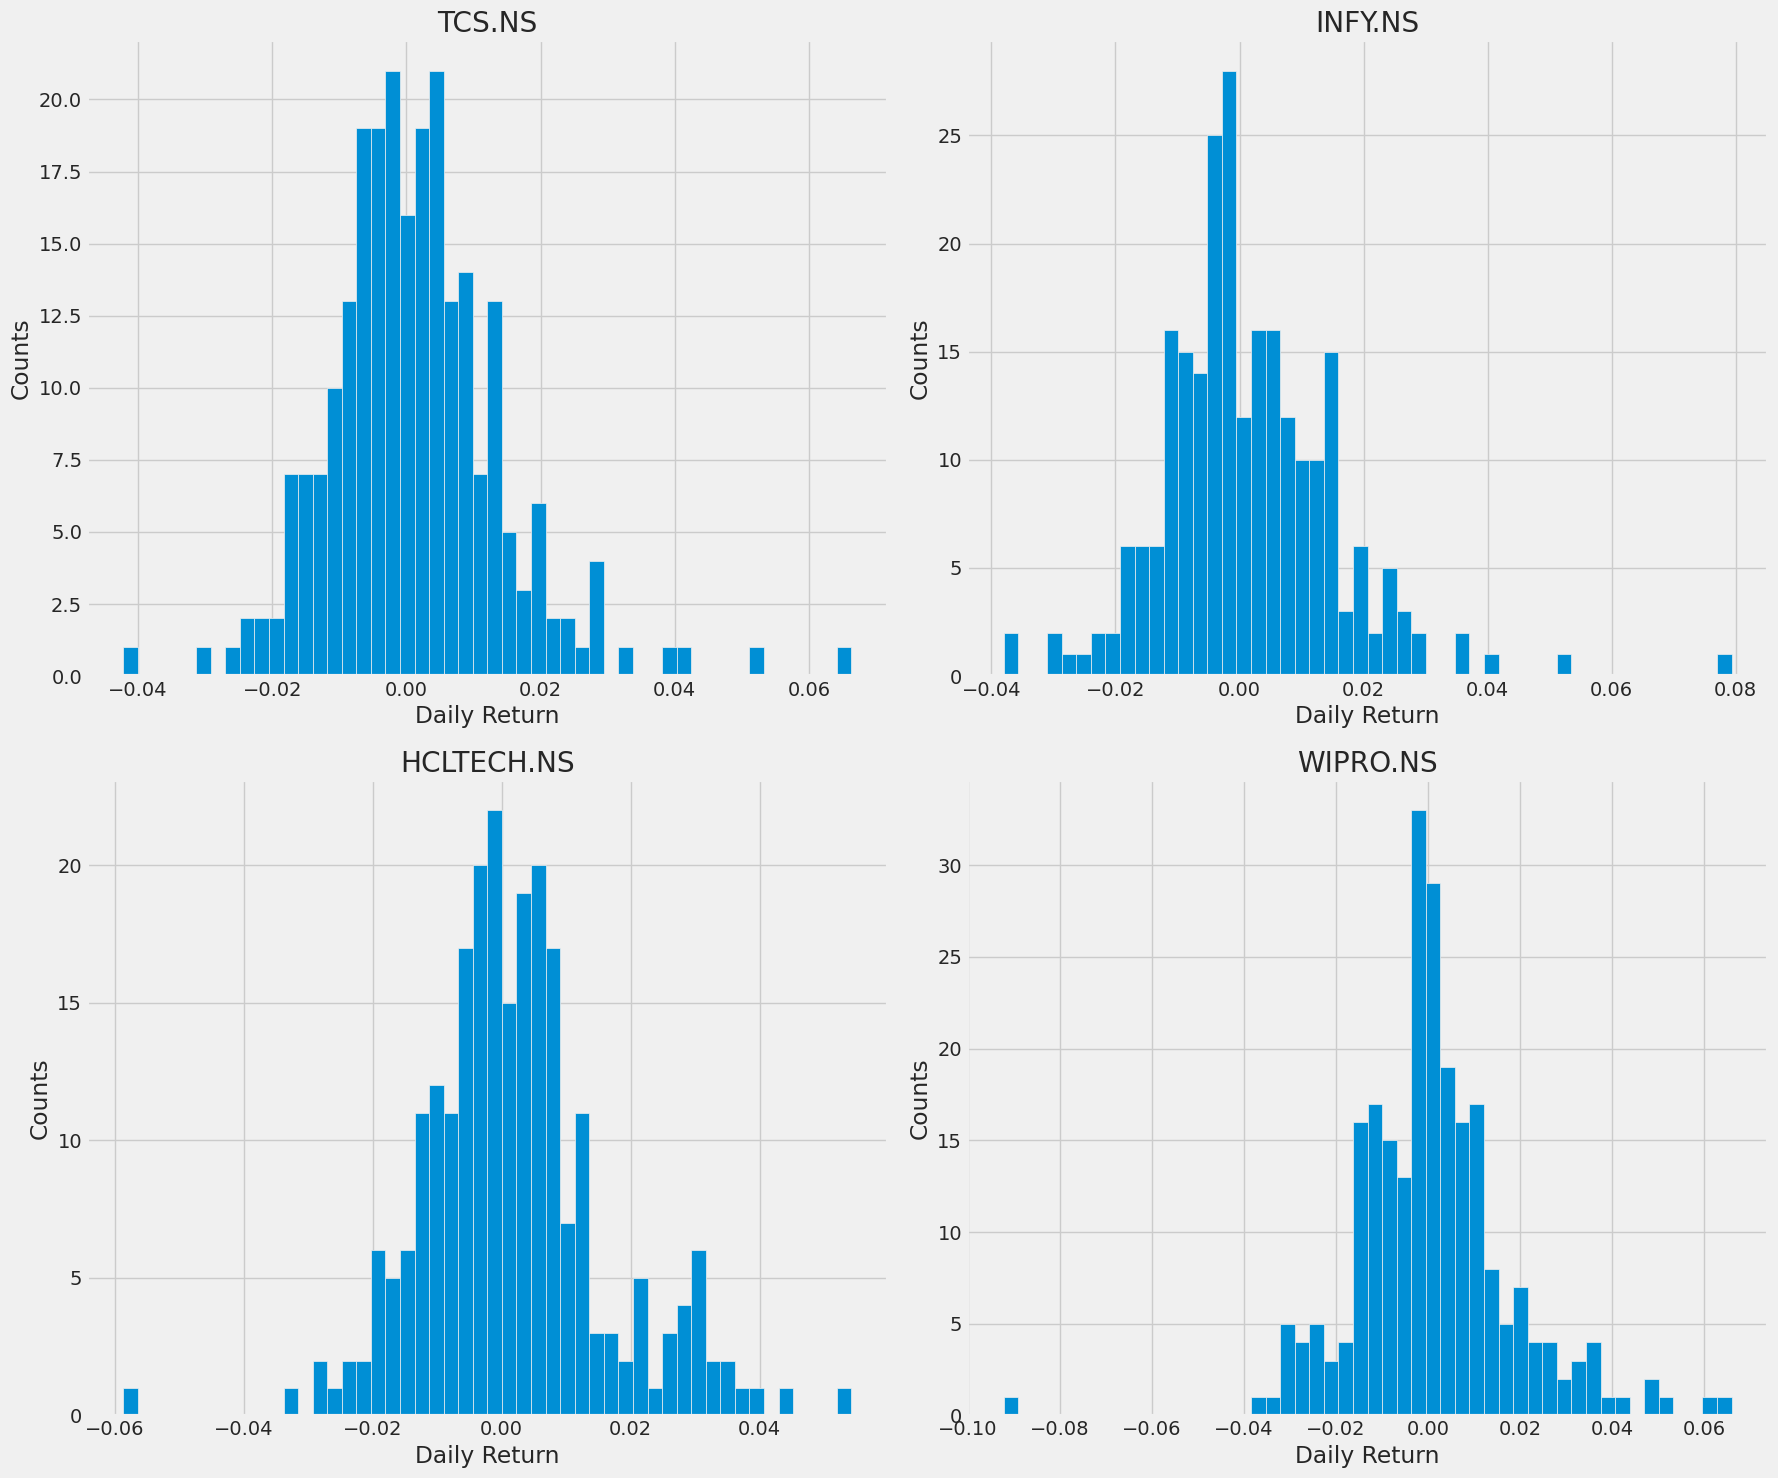

In [54]:
plt.figure(figsize=(18, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{stock_list[i - 1]}')

plt.tight_layout()

In [57]:
import yfinance as yf

# Assuming you have stock_list, start, and end defined
closing_df = yf.download(stock_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,HCLTECH.NS,INFY.NS,TCS.NS,WIPRO.NS
Date,,,,
2023-09-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-09-12 00:00:00+00:00,0.000663,0.016695,0.028773,0.000345
2023-09-13 00:00:00+00:00,-0.005576,-0.001832,-0.003617,0.001609
2023-09-14 00:00:00+00:00,0.006548,0.005740,-0.002186,0.001721
2023-09-15 00:00:00+00:00,0.016360,0.003086,0.010744,0.010540


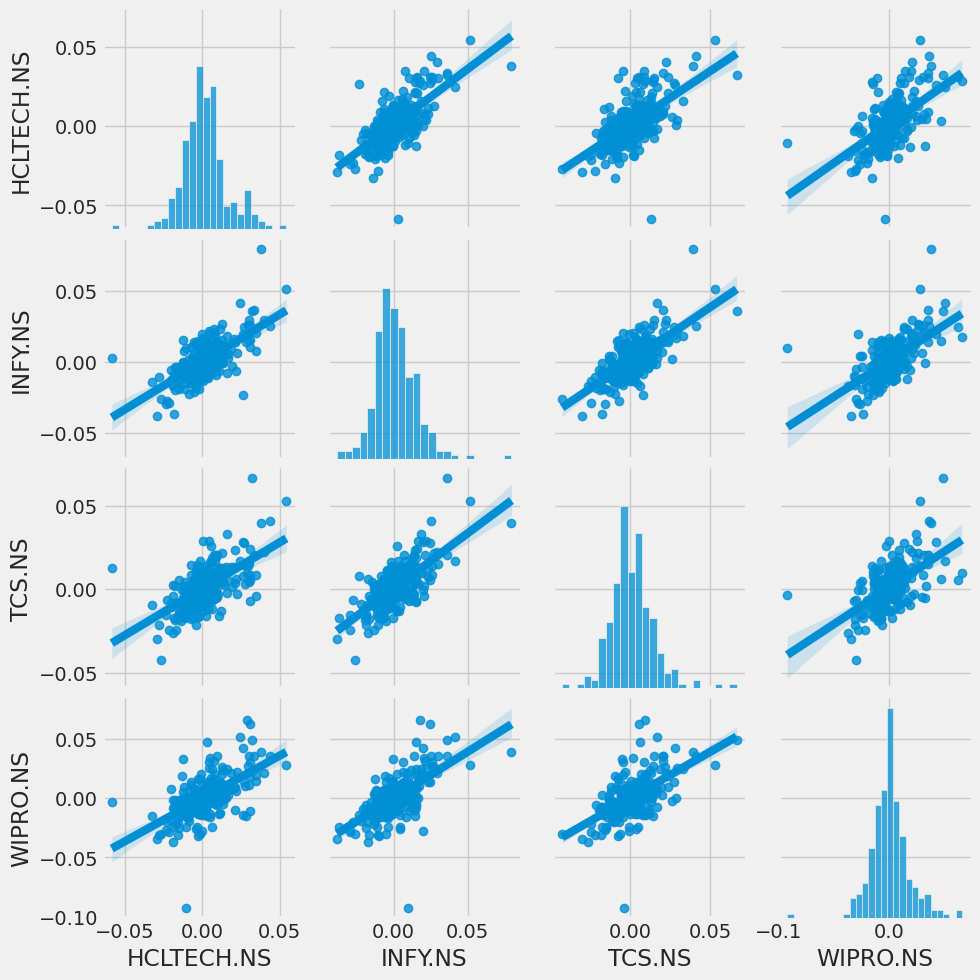

In [58]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

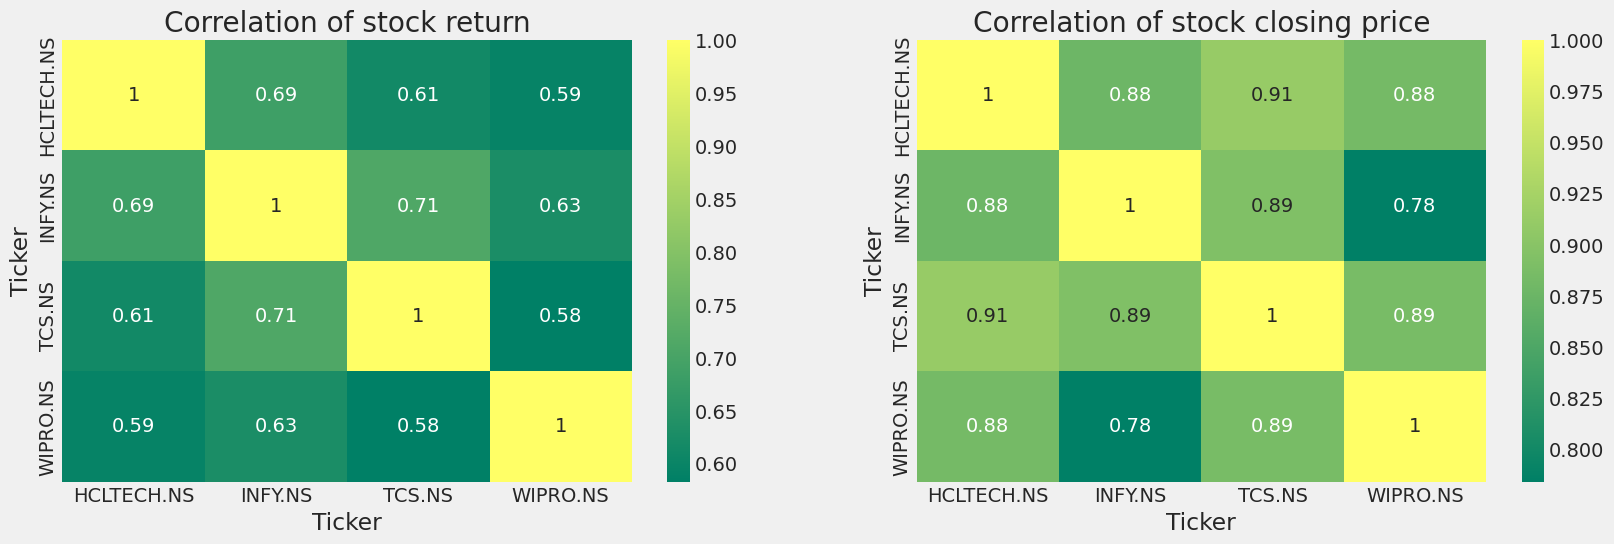

In [59]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

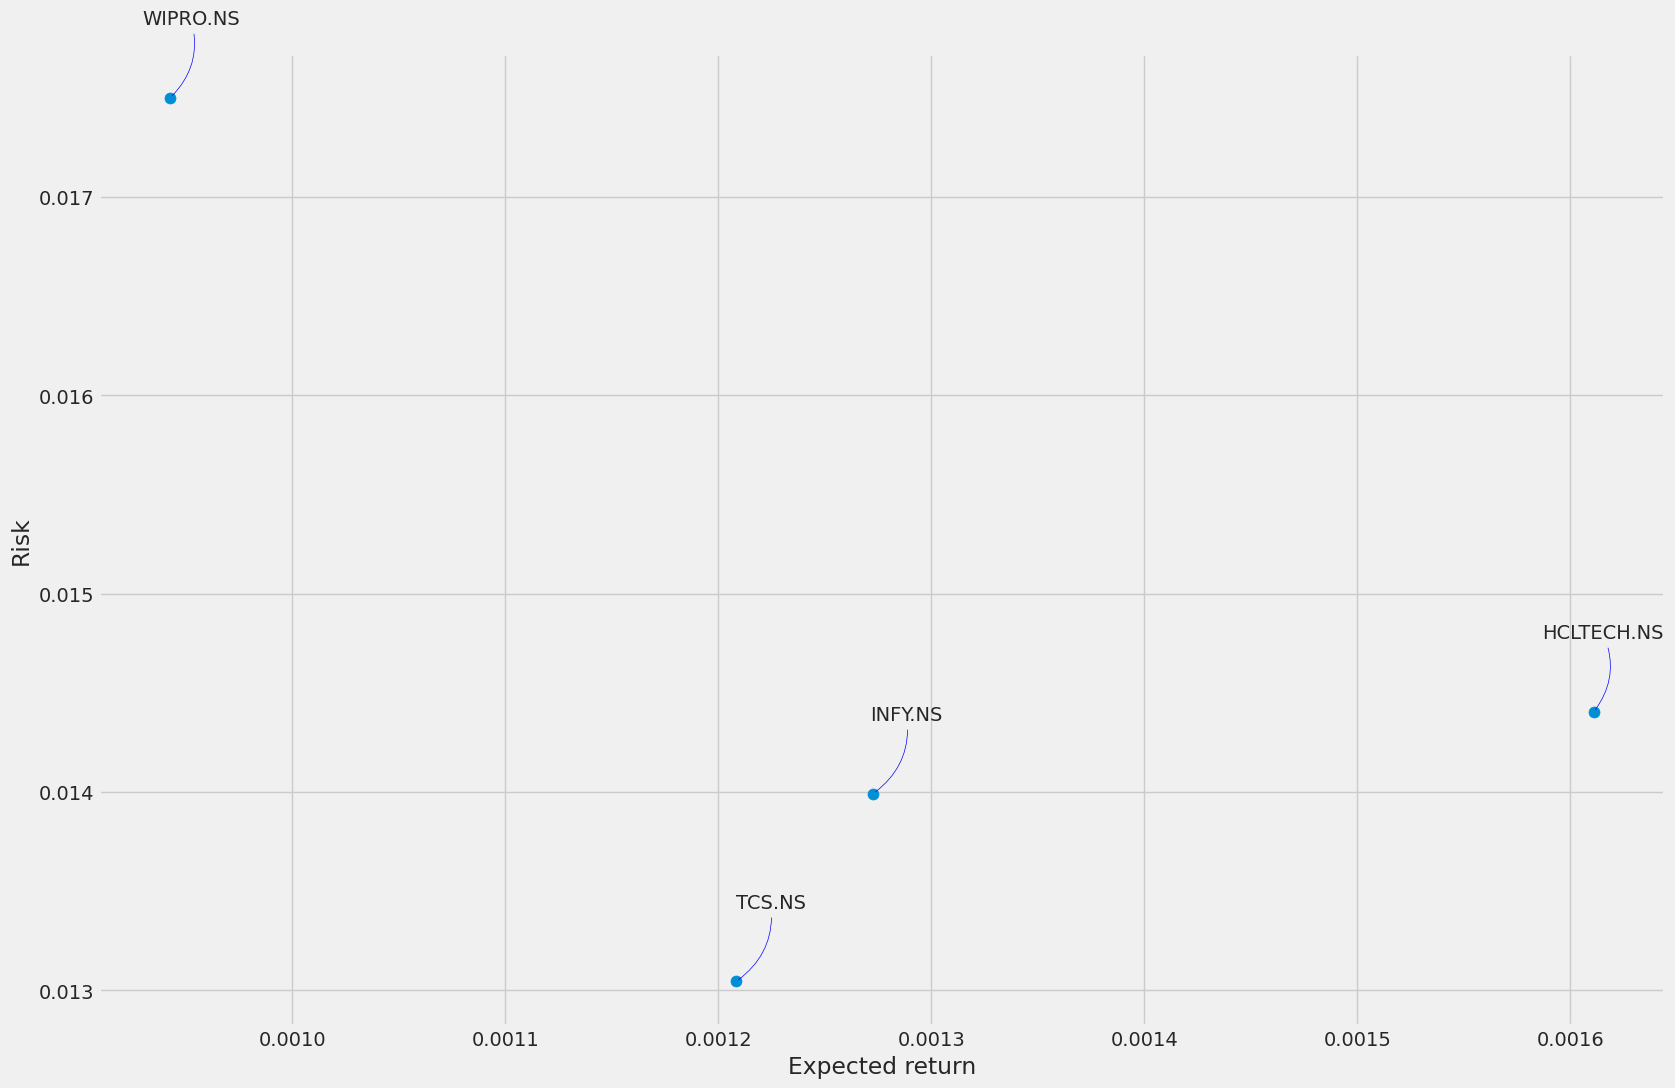

In [60]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(18, 12))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [62]:
from datetime import datetime
df = yf.download('TCS.NS', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [63]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,580.500000,592.974976,576.500000,589.299988,468.659821,2248542
2012-01-03,591.625000,604.950012,590.000000,598.799988,476.215027,2708884
2012-01-04,602.450012,602.500000,584.650024,586.500000,466.433136,2386770
2012-01-05,586.400024,592.500000,583.674988,586.000000,466.035278,2547312
2012-01-06,583.000000,594.174988,578.400024,584.700012,465.001587,2119728
...,...,...,...,...,...,...
2024-09-04,4476.950195,4487.000000,4436.700195,4479.250000,4479.250000,1265505
2024-09-05,4481.000000,4499.000000,4454.149902,4475.950195,4475.950195,1688793
2024-09-06,4473.950195,4518.950195,4440.000000,4456.750000,4456.750000,1649179


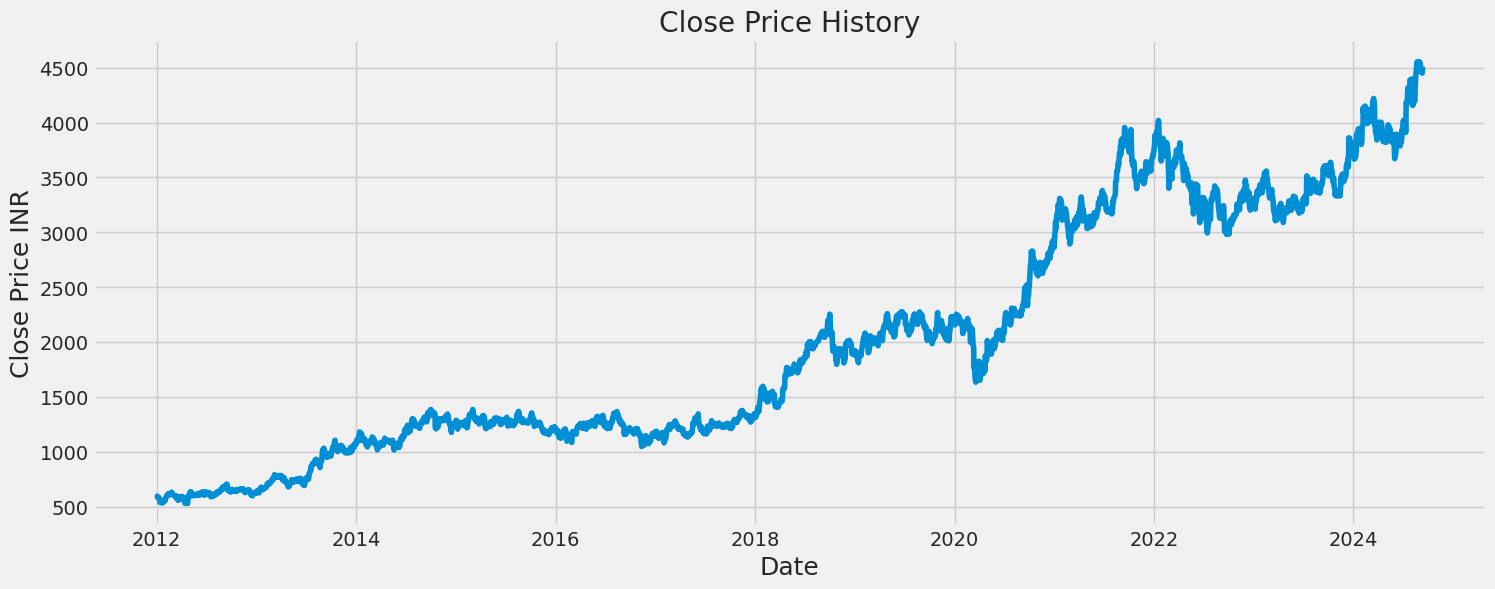

In [64]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [65]:
train_val_split = .9
window_size = 30
epochs = 10

In [66]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * train_val_split ))

training_data_len

2816

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01421689],
       [0.01657912],
       [0.01352065],
       ...,
       [0.9758804 ],
       [0.97409003],
       [0.98858673]])

In [68]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size+1:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01421689, 0.01657912, 0.01352065, 0.01339633, 0.01307308,
       0.01331551, 0.01257577, 0.00904485, 0.00313928, 0.00267305,
       0.00561341, 0.00493581, 0.0014795 , 0.00140491, 0.001896  ,
       0.0016722 , 0.00303981, 0.00419607, 0.00553259, 0.00590557,
       0.00847295, 0.00801292, 0.01041246, 0.01334038, 0.01611289,
       0.01662885, 0.01932055, 0.02043328, 0.02103006, 0.02007273])]
[0.019364063034221224]

[array([0.01421689, 0.01657912, 0.01352065, 0.01339633, 0.01307308,
       0.01331551, 0.01257577, 0.00904485, 0.00313928, 0.00267305,
       0.00561341, 0.00493581, 0.0014795 , 0.00140491, 0.001896  ,
       0.0016722 , 0.00303981, 0.00419607, 0.00553259, 0.00590557,
       0.00847295, 0.00801292, 0.01041246, 0.01334038, 0.01611289,
       0.01662885, 0.01932055, 0.02043328, 0.02103006, 0.02007273]), array([0.01657912, 0.01352065, 0.01339633, 0.01307308, 0.01331551,
       0.01257577, 0.00904485, 0.00313928, 0.00267305, 0.00561341,
       0.00493581, 0.0014795 , 0

In [69]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True,input_shape= (x_train.shape[1], 1)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=100, epochs=epochs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - loss: 0.0853
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0017
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 5.4207e-04
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 3.9700e-04
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 3.6116e-04
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 3.7302e-04
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 3.4909e-04
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - loss: 3.9106e-04
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - loss: 3.3460e-04
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - loss: 3.5070e-04


In [70]:
test_data = scaled_data[training_data_len - window_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


167.12512247098348

<ipython-input-71-206ffc3f2e63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


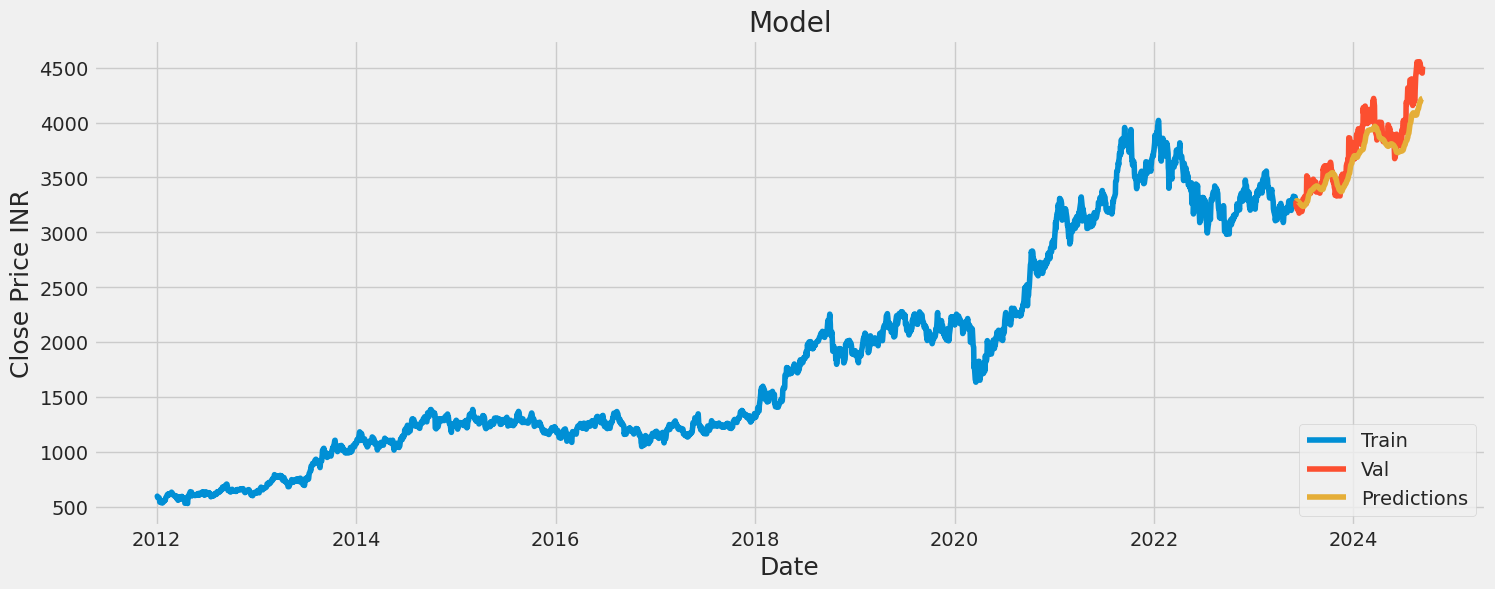

In [71]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [72]:
valid

,Close,Predictions
Date,,
2023-06-05,3288.899902,3283.872070
2023-06-06,3232.300049,3287.101562
2023-06-07,3274.899902,3287.983398
2023-06-08,3236.449951,3288.446533
2023-06-09,3209.300049,3287.294434
...,...,...
2024-09-04,4479.250000,4204.245605
2024-09-05,4475.950195,4210.584473
2024-09-06,4456.750000,4215.288574
